# Word Embeddings: Intro to CBOW model, activation functions and working with Numpy

In this lecture notebook you will be given an introduction to the continuous bag-of-words model, its activation functions and some considerations when working with Numpy. 

Let's dive into it!

In [1]:
import numpy as np

# The continuous bag-of-words model

The CBOW model is based on a neural network, the architecture of which looks like the figure below, as you'll recall from the lecture.

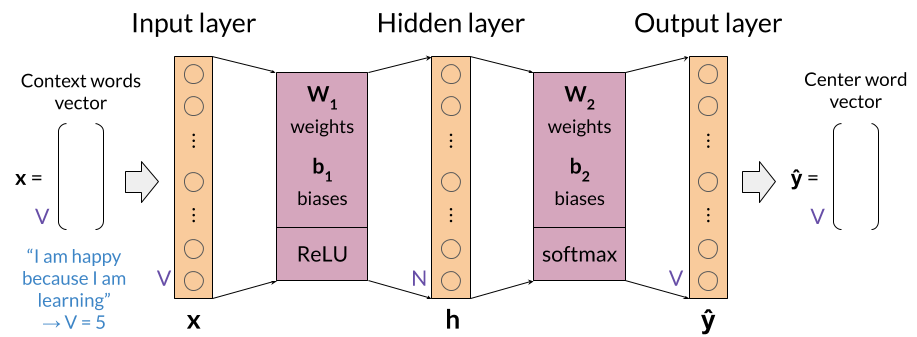

## Activation functions

Let's start by implementing the activation functions, ReLU and softmax.

### ReLU

ReLU is used to calculate the values of the hidden layer, in the following formulas:

\begin{align}
 \mathbf{z_1} &= \mathbf{W_1}\mathbf{x} + \mathbf{b_1}  \tag{1} \\
 \mathbf{h} &= \mathrm{ReLU}(\mathbf{z_1})  \tag{2} \\
\end{align}


Let's fix a value for $\mathbf{z_1}$ as a working example.

In [2]:
# Define a random seed so all random outcomes can be reproduced
np.random.seed(10)

# Define a 5X1 column vector using numpy
z_1 = 10*np.random.rand(5, 1)-5

# Print the vector
z_1

array([[ 2.71320643],
       [-4.79248051],
       [ 1.33648235],
       [ 2.48803883],
       [-0.01492988]])

Notice that using numpy's `random.rand` function returns a numpy array filled with values taken from a uniform distribution over [0, 1). Numpy allows vectorization so each value is multiplied by 10 and then substracted 5.

To get the ReLU of this vector, you want all the negative values to become zeros.

First create a copy of this vector.

In [3]:
# Create copy of vector and save it in the 'h' variable
h = z_1.copy()

Now determine which of its values are negative.

In [4]:
# Determine which values met the criteria (this is possible because of vectorization)
h < 0

array([[False],
       [ True],
       [False],
       [False],
       [ True]])

You can now simply set all of the values which are negative to 0.

In [5]:
# Slice the array or vector. This is the same as applying ReLU to it
h[h < 0] = 0

And that's it: you have the ReLU of $\mathbf{z_1}$!

In [6]:
# Print the vector after ReLU
h

array([[2.71320643],
       [0.        ],
       [1.33648235],
       [2.48803883],
       [0.        ]])

**Now implement ReLU as a function.**

In [7]:
# Define the 'relu' function that will include the steps previously seen
def relu(z):
    result = z.copy()
    result[result < 0] = 0
    return result

**And check that it's working.**

In [8]:
# Define a new vector and save it in the 'z' variable
z = np.array([[-1.25459881], [ 4.50714306], [ 2.31993942], [ 0.98658484], [-3.4398136 ]])

# Apply ReLU to it
relu(z)

array([[0.        ],
       [4.50714306],
       [2.31993942],
       [0.98658484],
       [0.        ]])

Expected output:

    array([[0.        ],
           [4.50714306],
           [2.31993942],
           [0.98658484],
           [0.        ]])

### Softmax

The second activation function that you need is softmax. This function is used to calculate the values of the output layer of the neural network, using the following formulas:

\begin{align}
 \mathbf{z_2} &= \mathbf{W_2}\mathbf{h} + \mathbf{b_2}   \tag{3} \\
 \mathbf{\hat y} &= \mathrm{softmax}(\mathbf{z_2})   \tag{4} \\
\end{align}

To calculate softmax of a vector $\mathbf{z}$, the $i$-th component of the resulting vector is given by:

$$ \textrm{softmax}(\textbf{z})_i = \frac{e^{z_i} }{\sum\limits_{j=1}^{V} e^{z_j} }  \tag{5} $$

Let's work through an example.

In [9]:
# Define a new vector and save it in the 'z' variable
z = np.array([9, 8, 11, 10, 8.5])

# Print the vector
z

array([ 9. ,  8. , 11. , 10. ,  8.5])

You'll need to calculate the exponentials of each element, both for the numerator and for the denominator.

In [10]:
# Save exponentials of the values in a new vector
e_z = np.exp(z)

# Print the vector with the exponential values
e_z

array([ 8103.08392758,  2980.95798704, 59874.1417152 , 22026.46579481,
        4914.7688403 ])

The denominator is equal to the sum of these exponentials.

In [11]:
# Save the sum of the exponentials
sum_e_z = np.sum(e_z)

# Print sum of exponentials
sum_e_z

97899.41826492078

And the value of the first element of $\textrm{softmax}(\textbf{z})$ is given by:

In [12]:
# Print softmax value of the first element in the original vector
e_z[0]/sum_e_z

0.08276947985173956

This is for one element. You can use numpy's vectorized operations to calculate the values of all the elements of the $\textrm{softmax}(\textbf{z})$ vector in one go.

**Implement the softmax function.**

In [14]:
# Define the 'softmax' function that will include the steps previously seen
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

**Now check that it works.**

In [15]:
# Print softmax values for original vector
softmax([9, 8, 11, 10, 8.5])

array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

Expected output:

    array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

Notice that the sum of all these values is equal to 1.

In [16]:
# Assert that the sum of the softmax values is equal to 1
np.sum(softmax([9, 8, 11, 10, 8.5])) == 1

True

## Dimensions: 1-D arrays vs 2-D column vectors

Before moving on to implement forward propagation, backpropagation, and gradient descent in the next lecture notebook, let's have a look at the dimensions of the vectors you've been handling until now.

Create a vector of length $V$ filled with zeros.

In [17]:
# Define V. Remember this was the size of the vocabulary in the previous lecture notebook
V = 5

# Define vector of length V filled with zeros
x_array = np.zeros(V)

# Print vector
x_array

array([0., 0., 0., 0., 0.])

This is a 1-dimensional array, as revealed by the `.shape` property of the array.

In [18]:
# Print vector's shape
x_array.shape

(5,)

To perform matrix multiplication in the next steps, you actually need your column vectors to be represented as a matrix with one column. In numpy, this matrix is represented as a 2-dimensional array.

The easiest way to convert a 1D vector to a 2D column matrix is to set its `.shape` property to the number of rows and one column, as shown in the next cell.

In [19]:
# Copy vector
x_column_vector = x_array.copy()

# Reshape copy of vector
x_column_vector.shape = (V, 1)  # alternatively ... = (x_array.shape[0], 1)

# Print vector
x_column_vector

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

The shape of the resulting "vector" is:

In [20]:
# Print vector's shape
x_column_vector.shape

(5, 1)

So you now have a 5x1 matrix that you can use to perform standard matrix multiplication.

**Congratulations on finishing this lecture notebook!** Hopefully you now have a better understanding of the activation functions used in the continuous bag-of-words model, as well as a clearer idea of how to leverage Numpy's power for these types of mathematical computations.

In the next lecture notebook you will get a comprehensive dive into:

- Forward propagation.

- Cross-entropy loss.

- Backpropagation.

- Gradient descent.

**See you next time!**